In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df_index = pd.read_csv("economic_index.csv")

In [3]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
df_index.columns

Index(['Unnamed: 0', 'year', 'month', 'interest_rate', 'unemployment_rate',
       'index_price'],
      dtype='object')

Feature Selection

In [5]:
#drop unnecessary columns
df_index.drop(columns=['Unnamed: 0', 'year', 'month'],axis=1,inplace = True)

In [6]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [7]:
#check null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

Data Visualization

In [10]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   -------- ------------------------------- 61.4/294.9 kB ? eta -:--:--
   --------- ----------------------------- 71.7/294.9 kB 975.2 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 744.7 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 744.7 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 544.7 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/294.9 kB 423.5 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/294.9 kB 423.5 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/294.9 kB 387.0 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/294.9 kB 352.2 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/294.9 kB 360.9 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/294.9 kB 360.9 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/294.9 kB 

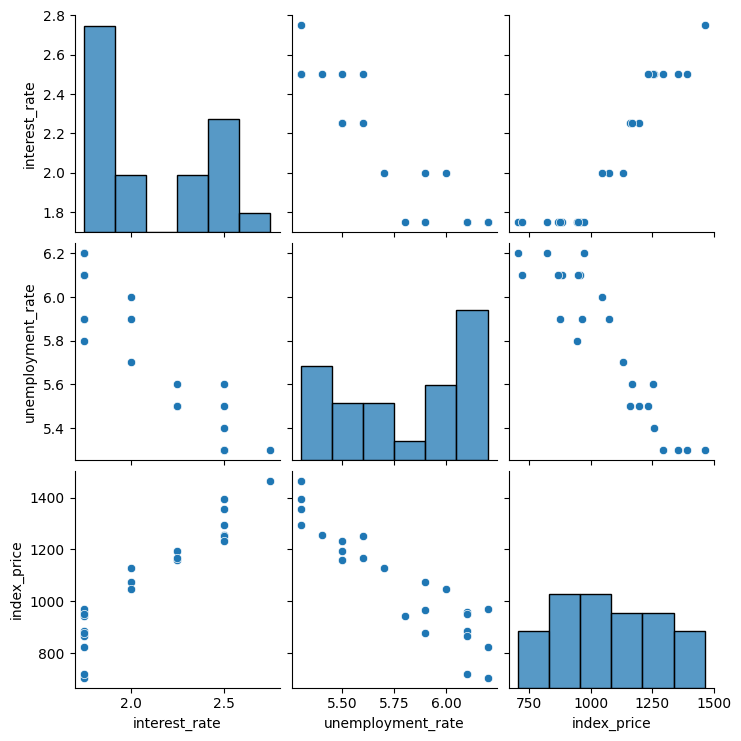

In [11]:
import seaborn as sns
sns.pairplot(df_index)


In [12]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment rate')

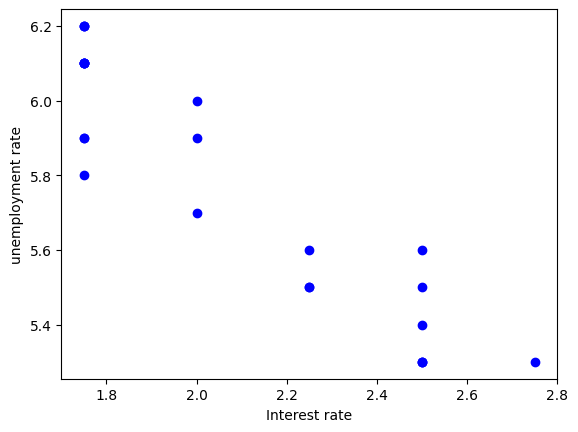

In [13]:
#Visualize the data points more closely
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='blue')
plt.xlabel("Interest rate")
plt.ylabel("unemployment rate")

Dependent and Independent features

In [14]:
X = df_index.iloc[:,:-1]
y = df_index.iloc[:,-1]

In [15]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [16]:
y.tail()

19    866
20    876
21    822
22    704
23    719
Name: index_price, dtype: int64

Split the data into train and  test

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

<Axes: xlabel='interest_rate', ylabel='index_price'>

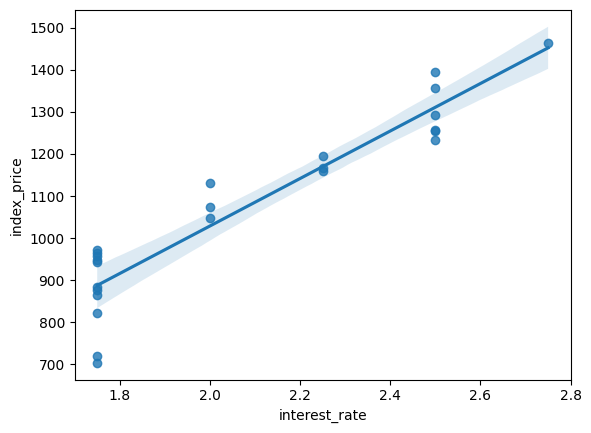

In [20]:
import seaborn as sns

sns.regplot(x='interest_rate', y='index_price', data=df_index)


<Axes: xlabel='index_price', ylabel='unemployment_rate'>

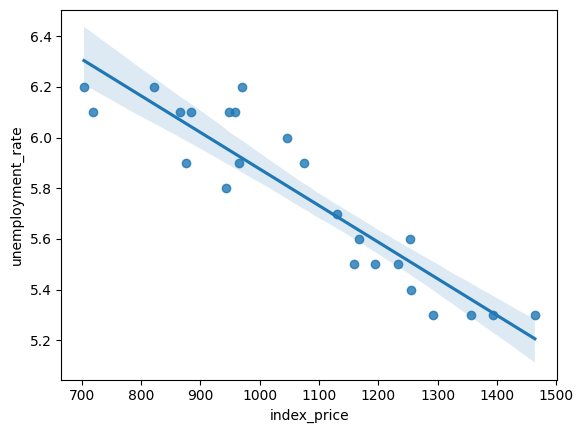

In [21]:
sns.regplot(x='index_price',y='unemployment_rate',data = df_index)

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.fit_transform(X_test)

In [24]:
X_train

array([[-0.16439899, -0.23281197],
       [ 1.39739139, -0.91333925],
       [-0.16439899,  0.44771532],
       [ 1.39739139, -1.59386653],
       [ 1.39739139, -1.25360289],
       [-0.94529418,  1.1282426 ],
       [-0.94529418,  1.1282426 ],
       [-0.94529418,  1.1282426 ],
       [-0.94529418,  1.46850624],
       [-0.94529418,  1.1282426 ],
       [-0.94529418,  0.44771532],
       [ 0.6164962 , -0.91333925],
       [ 0.6164962 , -0.57307561],
       [-0.94529418,  1.1282426 ],
       [-0.94529418,  0.44771532],
       [ 0.6164962 , -0.91333925],
       [ 1.39739139, -1.59386653],
       [ 1.39739139, -0.57307561],
       [-0.94529418,  0.10745168]])

In [25]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

Train the Model

In [26]:
regressor.fit(X_train,y_train)

LinearRegression()

In [27]:
#Cross Validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regressor,X_train,y_train,scoring='neg_mean_squared_error',cv=3)
#here cv = 3 means we are splitting data into 3 subsets

In [28]:
np.mean(validation_score)

-4693.367435499306

Prediction on test data

In [29]:
y_pred = regressor.predict(X_test)

In [30]:
y_pred

array([ 901.85112749,  901.85112749, 1310.62815206, 1241.0361564 ,
       1000.42291025])

In [31]:
y_test

22     704
21     822
0     1464
3     1293
12    1047
Name: index_price, dtype: int64

Performance metrics

In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

14782.772256053056
105.92300725348238
121.5844243974246


In [33]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)

0.8156182209864813


In [34]:
#adjusted r2_score
adj_score = 1 - (1- score)*(len(y_test) - 1)/(len(y_test)- X_test.shape[1]-1)
print(adj_score)

0.6312364419729626


Assumptions


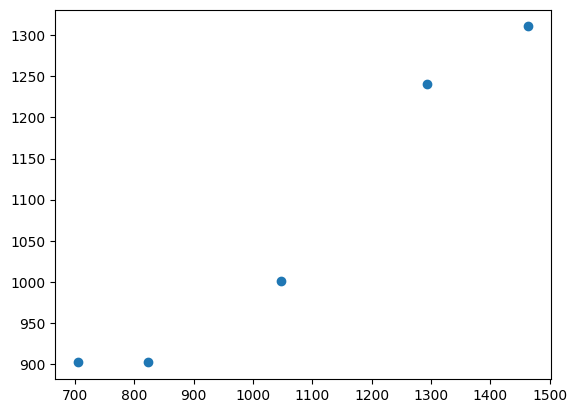

In [35]:
plt.scatter(y_test,y_pred)

In [36]:
residuals = y_test - y_pred
print(residuals)

22   -197.851127
21    -79.851127
0     153.371848
3      51.963844
12     46.577090
Name: index_price, dtype: float64


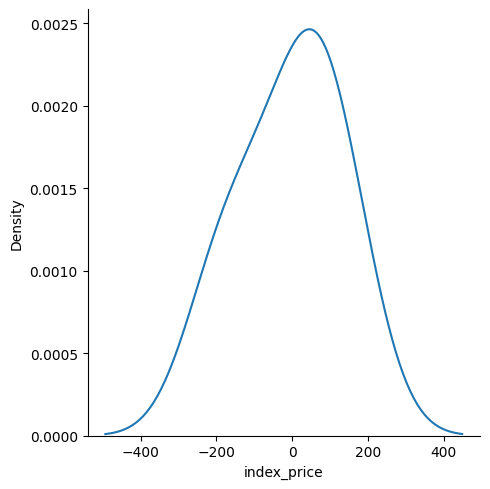

In [38]:
"""Plot the residuals to know whether the residuals follow a normal
distribution or not  using kernel density estimate (kde) function"""
sns.displot(residuals,kind = 'kde')

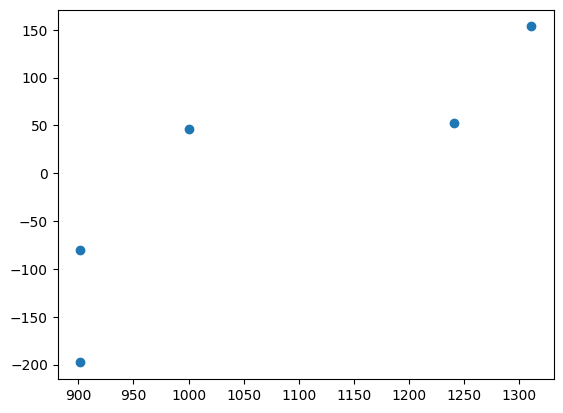

In [39]:
#Scatter plot with respect to residuals and predictions
plt.scatter(y_pred,residuals)

Ordinary Least Squares Linear Regression

In [41]:
pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB 1.3 MB/s eta 0:00:08
   ---------------------------------------- 0.1/9.8 MB 1.3 MB/s eta 0:00:08
    --------------------------------------- 0.2/9.8 MB 2.0 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/9.8 MB 3.7 MB/s eta 0:00:03
   ---- ----------------------------------- 1.1/9.8 MB 5.5 MB/s eta 0:00:02
   ------ --------------------------------- 1.7/9.8 MB 6.6 MB/s eta 0:00:02
   --------- ------------------------------ 2.3/9.8 MB 7.4 MB/s eta 0:00:02
   ----------- ---------------------------- 2.8/9.8 MB 8.2 MB/s eta 0:00:01
   ------------- -------------------------- 3.4/9.8 MB 8.6 MB/s eta 0:00:01
   ---------------- ----------------------- 4.0/9.8 MB 8.9 MB/s eta 0:00:01
   ------------------ --------------------- 4.7/9.8 MB 9.6 MB/s eta 0:00:01
   --------------------- ------------------ 5.3/9.8 MB 10.0 MB/s eta 0:00:01
   ---------------

In [42]:
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()

In [43]:
model.summary()

c:\Users\kumma\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  k, _ = kurtosistest(a, axis)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.024
Model:                            OLS   Adj. R-squared (uncentered):             -0.090
Method:                 Least Squares   F-statistic:                             0.2133
Date:                Fri, 16 Feb 2024   Prob (F-statistic):                       0.810
Time:                        16:14:05   Log-Likelihood:                         -159.54
No. Observations:                  19   AIC:                                      323.1
Df Residuals:                      17   BIC:                                      325.0
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           113.0736    661.251      0.171      0.866   -1282.044    1508.191
x2           -60.0938    661.251     -0.091      0.929   -1455.211    1335.024
==============================================================================
Omnibus:                        6.977   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                4.273
Skew:                          -0.946   Prob(JB):                        0.118
Kurtosis:                       4.348   Cond. No.                         4.88
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""